# Glas Box Models (ejemplos)

In [1]:
import sklearn
import shap
import interpret.glassbox
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np


# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


LinearRegression()

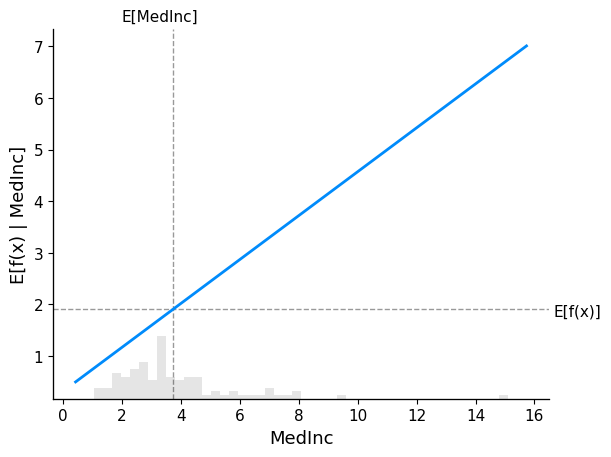

In [2]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [3]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

ExactExplainer explainer: 1001it [00:11, 15.84it/s]                                                                                                  


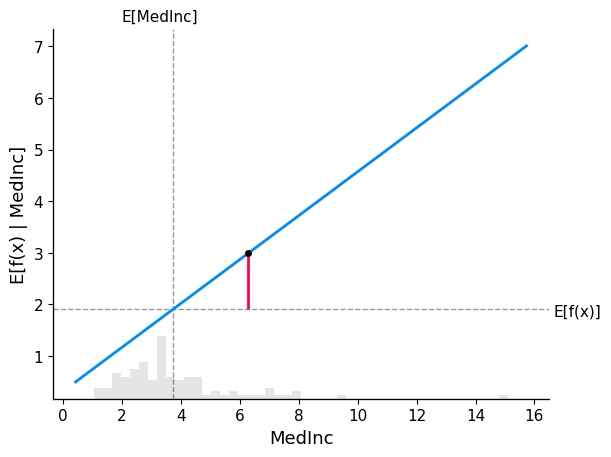

In [4]:
# make a standard partial dependence plot
sample_ind = 30
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

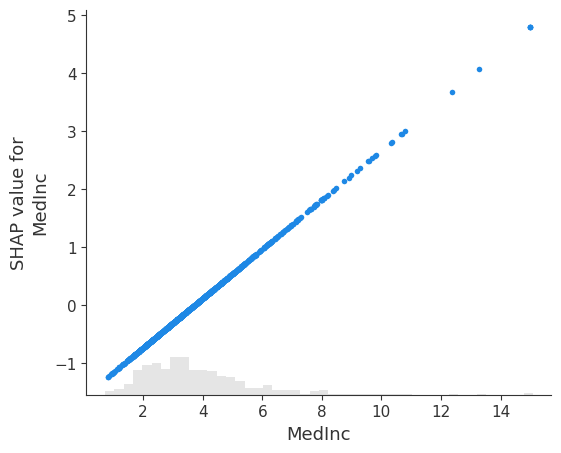

In [5]:
shap.plots.scatter(shap_values[:, "MedInc"])

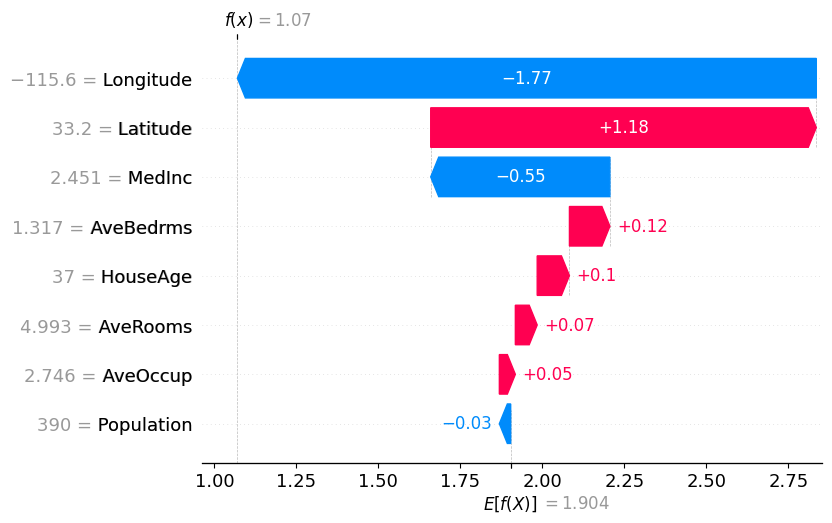

In [6]:
shap.plots.waterfall(shap_values[3], max_display=20)

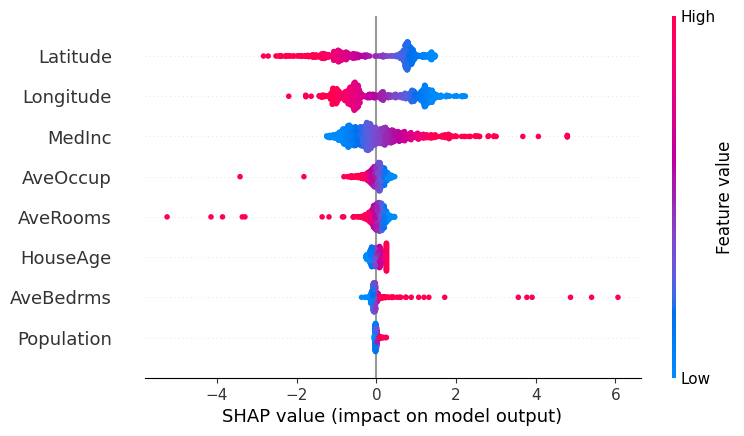

In [7]:
shap.plots.beeswarm(shap_values)

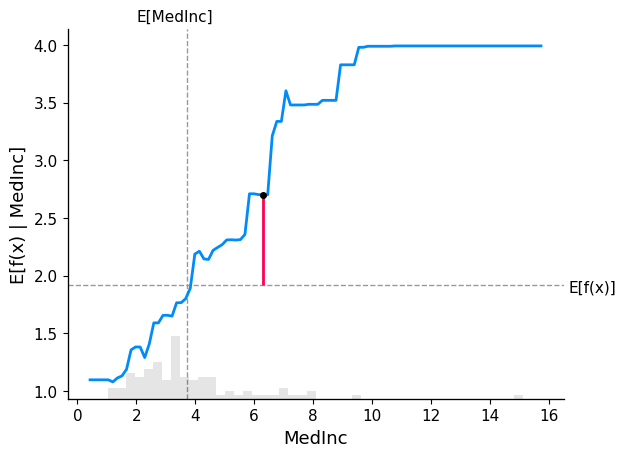

In [8]:
model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "MedInc",
    model_ebm.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_ebm[sample_ind : sample_ind + 1, :],
)

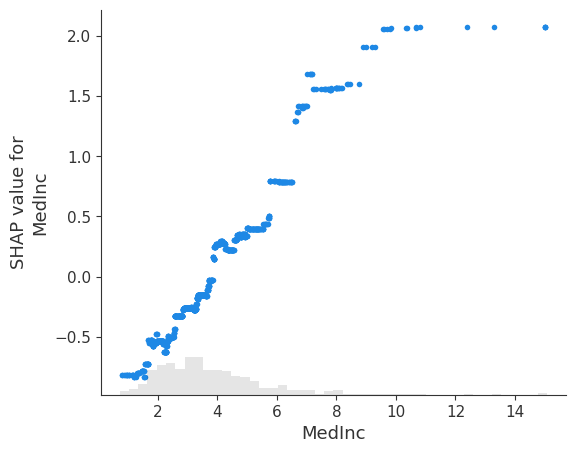

In [9]:
shap.plots.scatter(shap_values_ebm[:, "MedInc"])

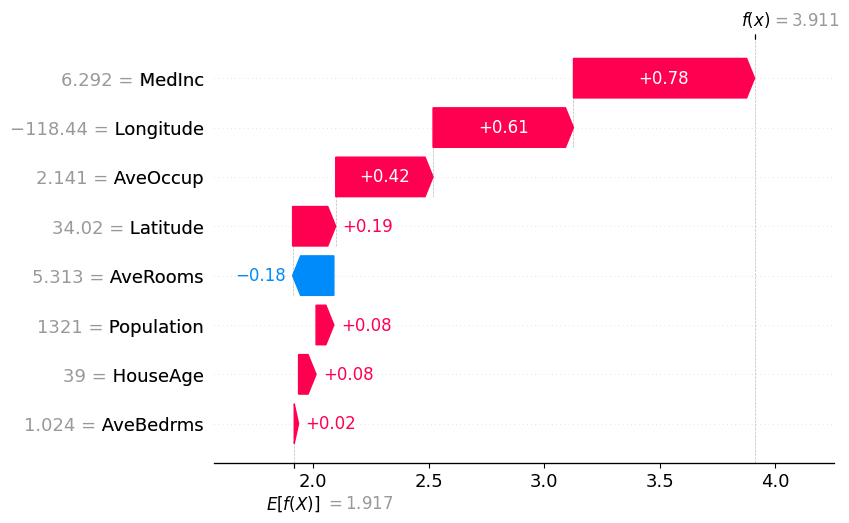

In [10]:
shap.plots.waterfall(shap_values_ebm[sample_ind])

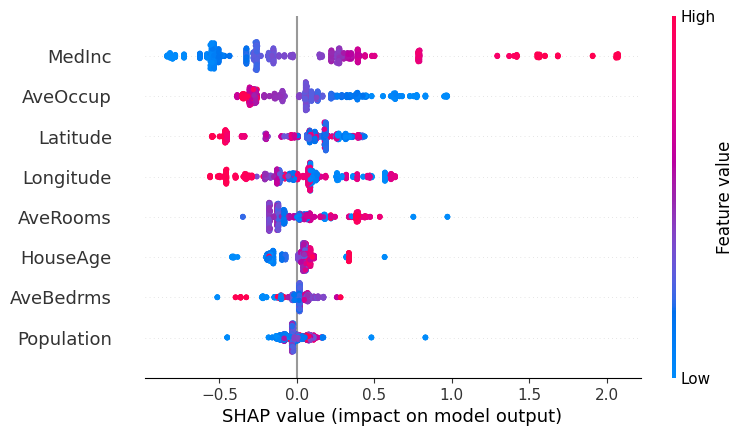

In [11]:
shap.plots.beeswarm(shap_values_ebm)

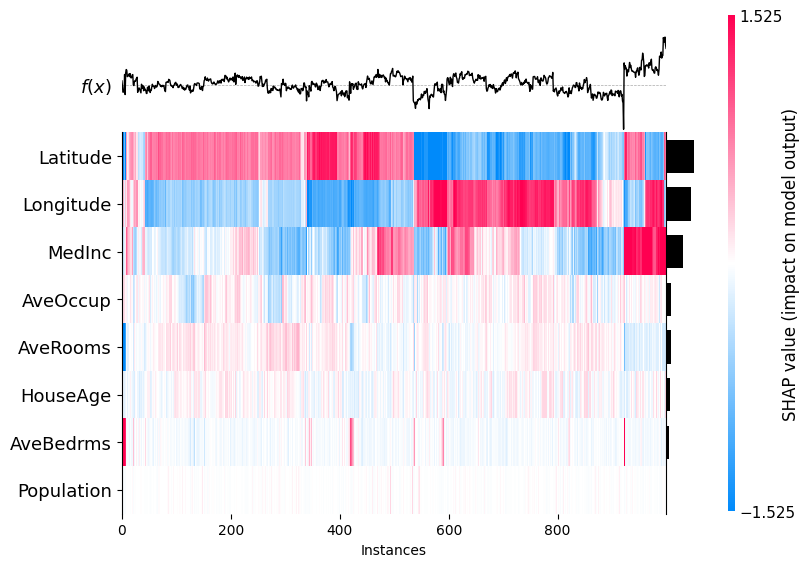

In [12]:
shap.plots.heatmap(shap_values)

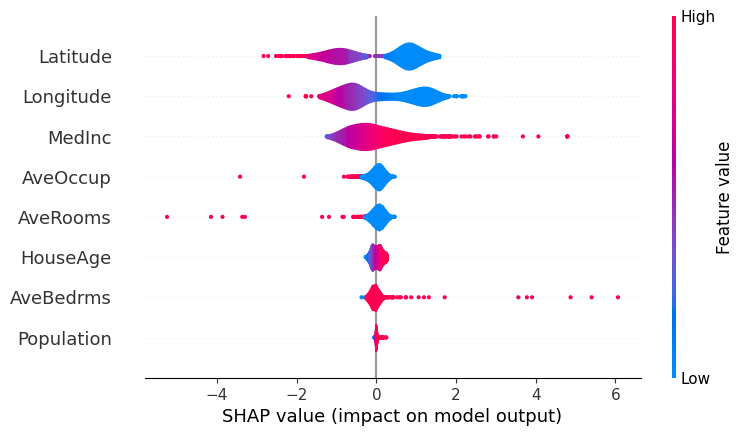

In [13]:
shap.plots.violin(shap_values)

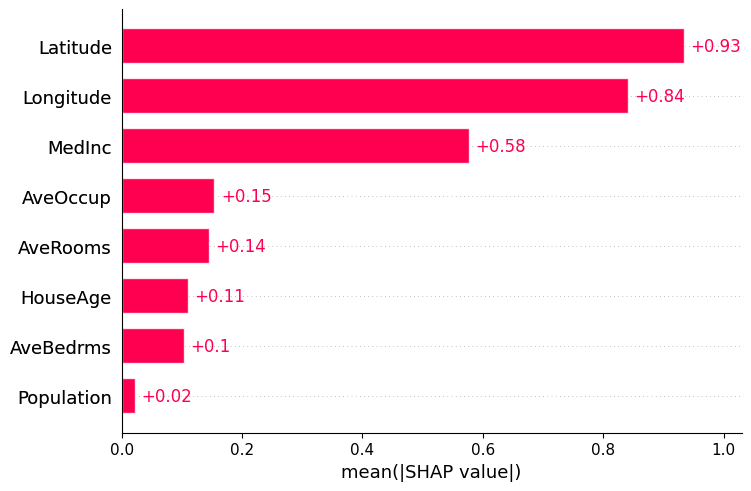

In [14]:
shap.plots.bar(shap_values)

# Adult dataset

In [15]:
X_adult, y_adult = shap.datasets.adult()

In [16]:
X_adult

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


<AxesSubplot: >

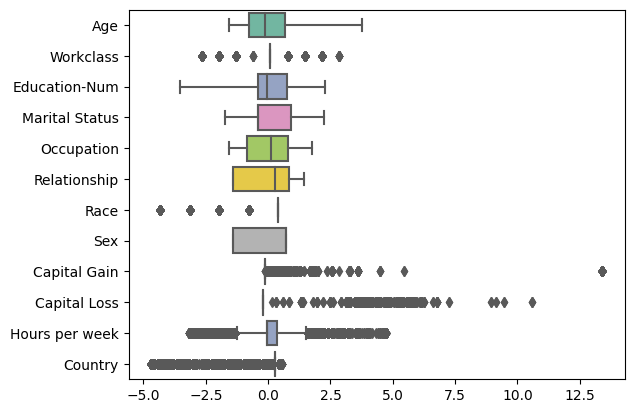

In [18]:
sns.boxplot(
    data=pd.DataFrame(StandardScaler().fit_transform(X_adult), columns=X_adult.columns),
    orient="h",
    palette="Set2",
    whis=3,
)

<AxesSubplot: >

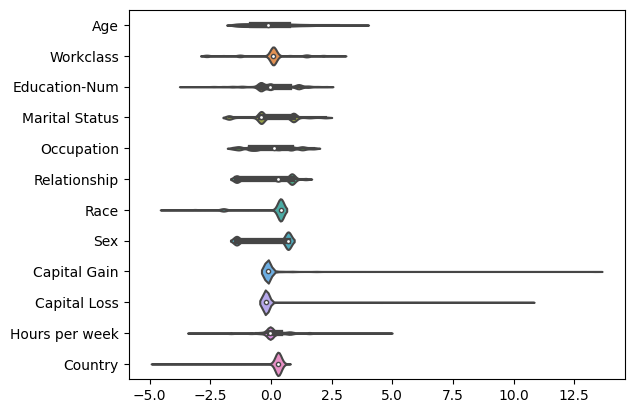

In [19]:
sns.violinplot(
    data=pd.DataFrame(StandardScaler().fit_transform(X_adult), columns=X_adult.columns),
    orient="h",
    cut=2,
)

### IsoletionForest (deteccion de anomalias)

In [20]:
isof = sklearn.ensemble.IsolationForest()
isof.fit(X_adult)

IsolationForest()

In [21]:
pred_out = isof.predict(X_adult)
pred_out = [True if p == 1 else False for p in pred_out]

In [22]:
X_adult[pred_out]

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
5,37.0,4,14.0,2,4,5,4,0,0.0,0.0,40.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22.0,4,10.0,4,11,0,4,1,0.0,0.0,40.0,39
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39


<AxesSubplot: >

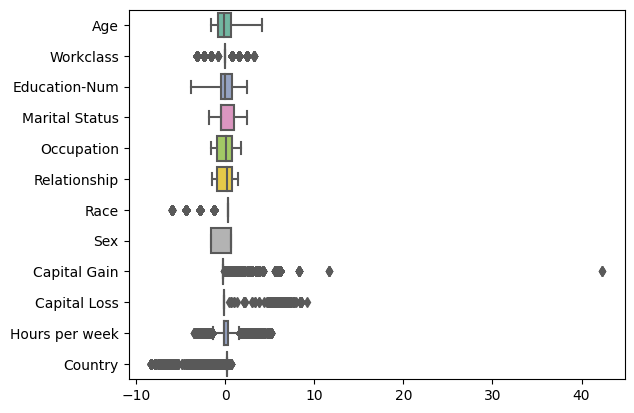

In [23]:
sns.boxplot(
    data=pd.DataFrame(
        StandardScaler().fit_transform(X_adult[pred_out]), columns=X_adult.columns
    ),
    orient="h",
    palette="Set2",
    whis=3,
)

### Interpretabilidad con SHAP

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_adult, y_adult, test_size=0.3)

In [29]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss",
}

model_xgboost = xgb.train(
    params,
    dtrain,
    1000,
    evals=[(dtest, "test")],
    verbose_eval=100,
    early_stopping_rounds=100,
)

[0]	test-logloss:0.54385
[100]	test-logloss:0.36514
[200]	test-logloss:0.32022
[300]	test-logloss:0.30352
[400]	test-logloss:0.29447
[500]	test-logloss:0.28992
[600]	test-logloss:0.28695
[700]	test-logloss:0.28548
[800]	test-logloss:0.28454
[900]	test-logloss:0.28405
[999]	test-logloss:0.28375


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

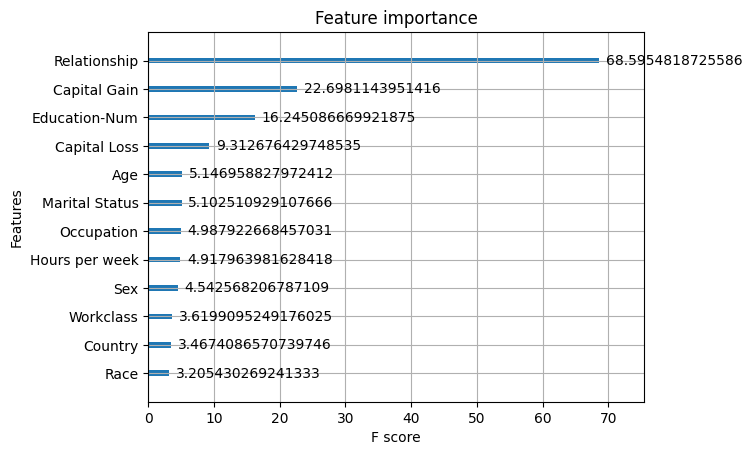

In [33]:
xgb.plot_importance(model_xgboost, importance_type="gain")

In [34]:
X_display, y_display = shap.datasets.adult(display=True)
explainer = shap.TreeExplainer(model_xgboost)
shap_values = explainer.shap_values(X_adult)

[21:38:16] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


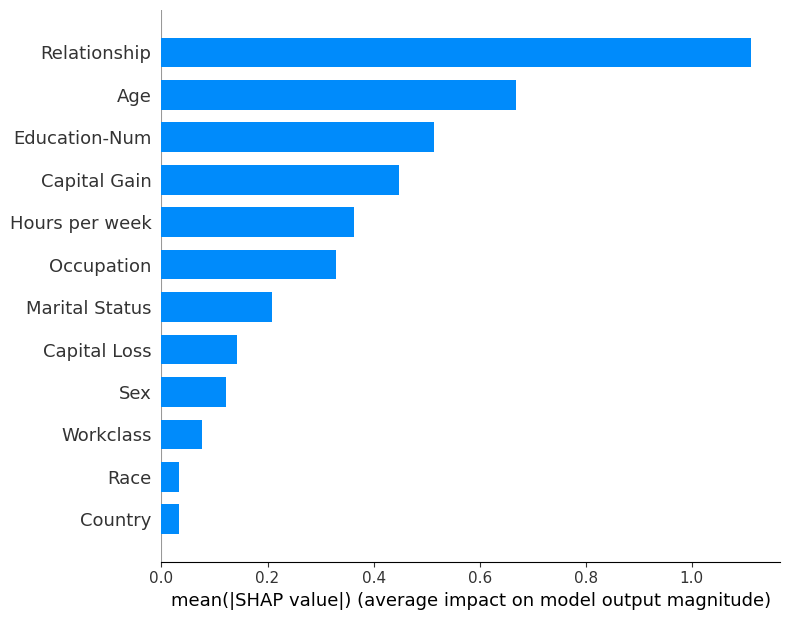

In [40]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [46]:
explainer = shap.Explainer(model_xgboost, X_test)
shap_values = explainer(X_test)

[21:45:11] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[21:45:12] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
100%|===================| 9741/9769 [05:11<00:00]        

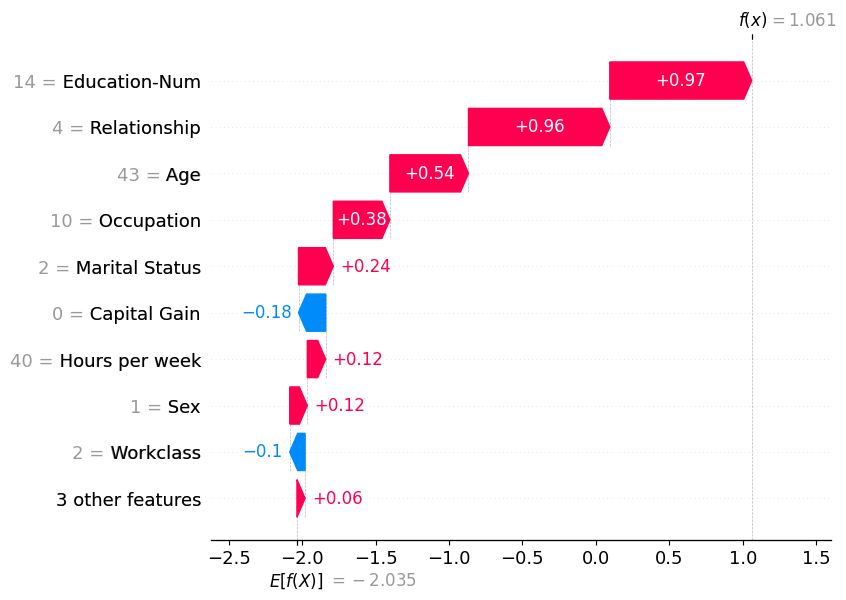

In [47]:
i = 10
shap.plots.waterfall(shap_values[i])

In [48]:
explainer = shap.TreeExplainer(model_xgboost)
shap_values = explainer.shap_values(X_adult)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values[i, :],
    features=X_display.iloc[i, :],
    link="logit",
)

[21:56:00] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [49]:
# Acá observamos el ejemplo anterior, los valores que toma cada uno de sus características
# Y el Shap value asociado a esta que dicha característica tome dicho valor.
sample = X_display.iloc[[i]].T
sample["Shap Values"] = shap_values[i].round(2)
sample["Shap Values Abs"] = sample["Shap Values"].abs()
sample.sort_values("Shap Values Abs", ascending=False).drop("Shap Values Abs", axis=1)

,10,Shap Values
Hours per week,80.0,0.85
Relationship,Husband,0.83
Occupation,Exec-managerial,0.38
Age,37.0,0.19
Capital Gain,0.0,-0.19
Workclass,Private,0.17
Education-Num,10.0,-0.16
Marital Status,Married-civ-spouse,0.11
Capital Loss,0.0,-0.08
Sex,Male,0.06


In [50]:
model_xgboost.predict(dtrain).mean().round(4)

0.2422

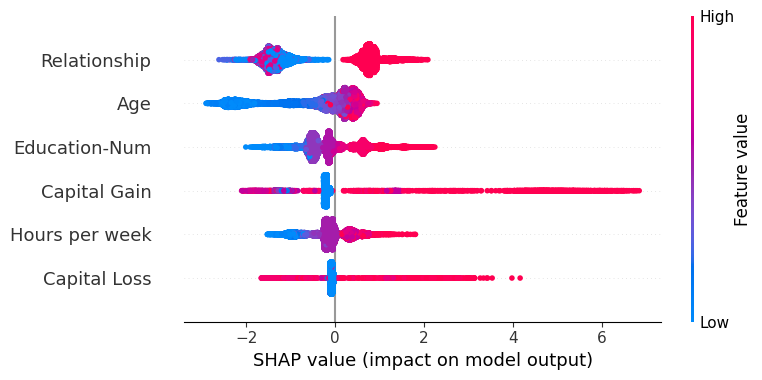

In [52]:
cols = [0, 2, 5, 8, 9, 10]
shap.summary_plot(shap_values[:, cols], X_adult.iloc[:, cols])


### Gráficos de dependencias

Los gráficos de dependencia muestran el efecto de un atributo específico a través de todo el conjunto de datos. Contrastan su valor con el valor SHAP de dicho atributo a través de muchos registros. Si bien son similares a los Partial Dependency Plots (PDP), toman además en cuenta las interacciones entre los atributos, que se evidencia en la dispersión vertical en un determinado valor y en el color de la variable elegida a tal fin.


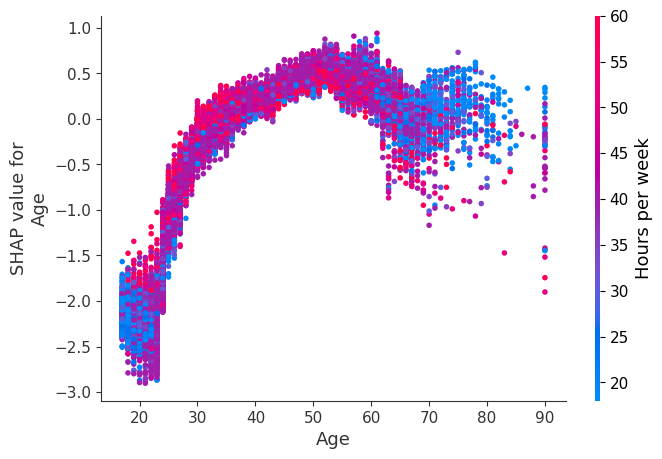

In [53]:
# Nota: Modificamos los gráficos de dependencias desde la teórica grabada
shap.dependence_plot(
    "Age", shap_values, X_adult, display_features=X_adult, interaction_index=10
)

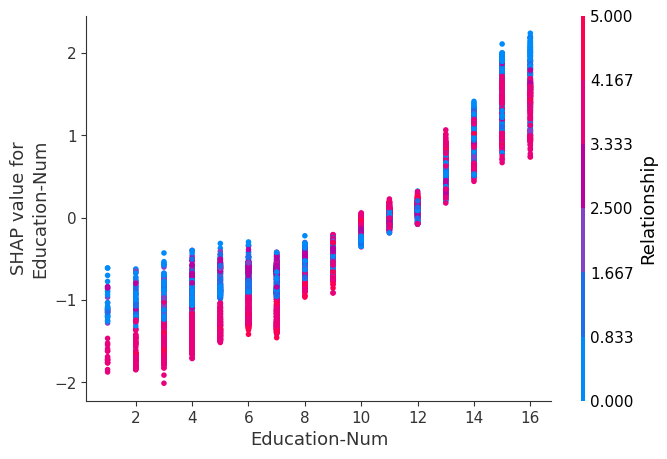

In [54]:
shap.dependence_plot(
    "Education-Num", shap_values, X_adult, display_features=X_adult, interaction_index=5
)

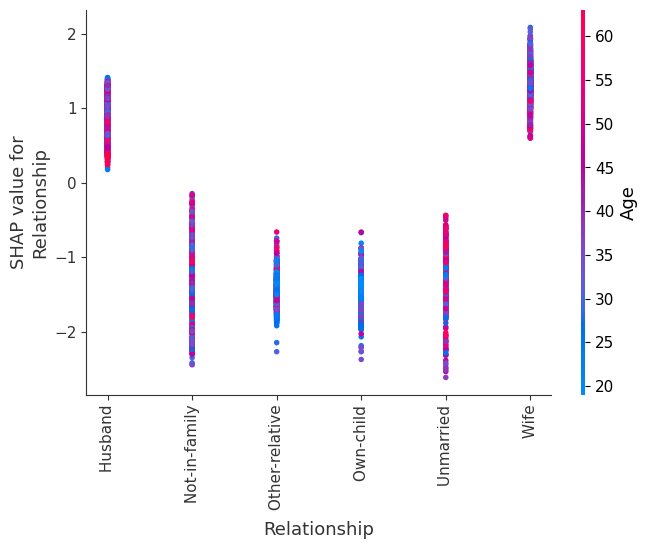

In [57]:
shap.dependence_plot(
    "Relationship",
    shap_values,
    X_display,
    display_features=X_display,
    interaction_index=0,
)